# Initial look at EKE using xmovie

### Install xmovie (not part of Docker image at present) and import packages

In [1]:
pip install xmovie

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from shapely.errors import ShapelyDeprecationWarning
from xmovie import Movie
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import cmocean
import file_io as io

import matplotlib as mpl
import matplotlib.patches as mpatches

warnings.filterwarnings(
    action='ignore',
    category=ShapelyDeprecationWarning,  # in cartopy
)
warnings.filterwarnings(
    action="ignore",
    category=UserWarning,
    message=r"No `(vmin|vmax)` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `\1` to avoid this step"
)

%matplotlib inline

### Ranges for plotting

In [3]:
# longitude and latitude range
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45
lon_range=(lon_min, lon_max)
lat_range=(lat_min, lat_max)

### Load data

In [4]:
# load dataset
ds = xr.open_dataset("../../so-chic-data/Stress_and_EKE/geovel_eke.nc")
ds = ds.sortby("longitude")
ds

# load fronts
pf = io.load_front("fronts/pf_kim.txt")
saccf = io.load_front("fronts/saccf_kim.txt")
saf = io.load_front("fronts/saf_kim.txt")
sbdy = io.load_front("fronts/sbdy_kim.txt")

### Calculate time mean values and anomalies

In [5]:
ds_mean = ds.mean(dim="time", skipna=True, keep_attrs=True)
ds_anomaly = ds - ds_mean
eke_anom = ds_anomaly.eke.clip(min=-0.005, max=0.005, keep_attrs=True)

### Plot mean EKE

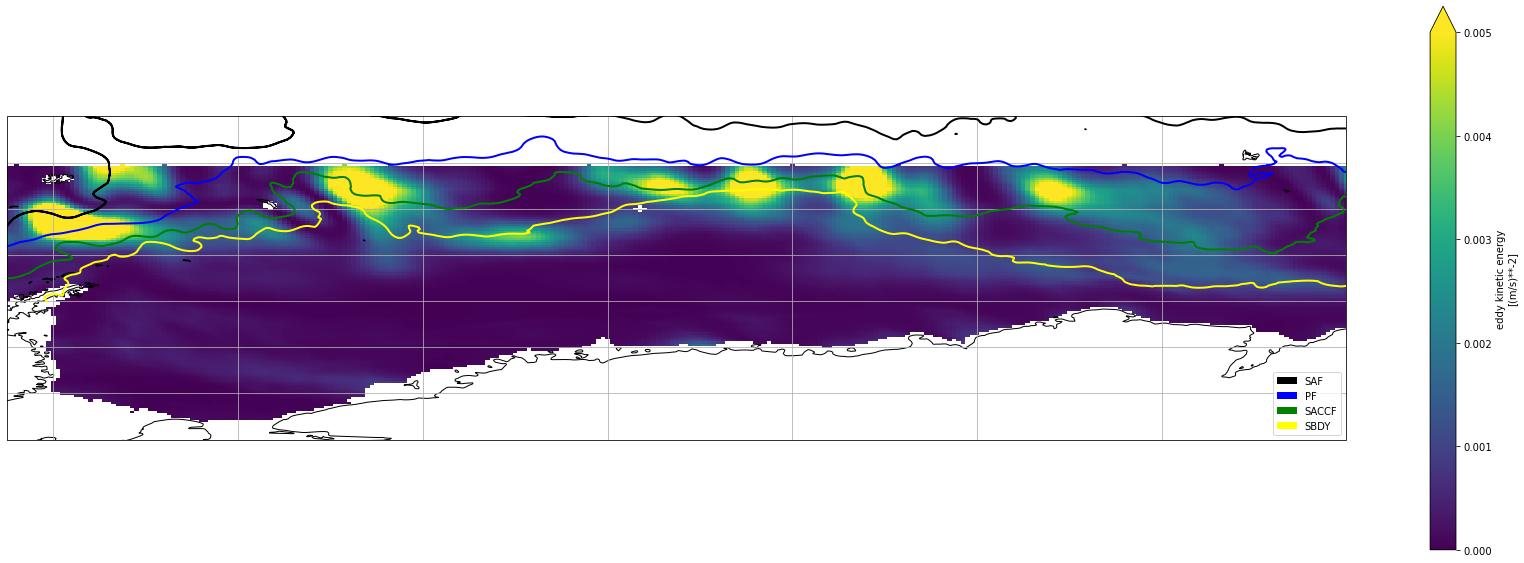

In [6]:
fig = plt.figure(figsize=(30,10)) 

p = ds_mean.eke.plot(
        subplot_kws=dict(projection=ccrs.PlateCarree()),
        vmin=0.0, vmax=0.005,
        transform=ccrs.PlateCarree())

p.axes.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                    ccrs.PlateCarree())

p.axes.coastlines()
p.axes.gridlines()

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

### Create movie

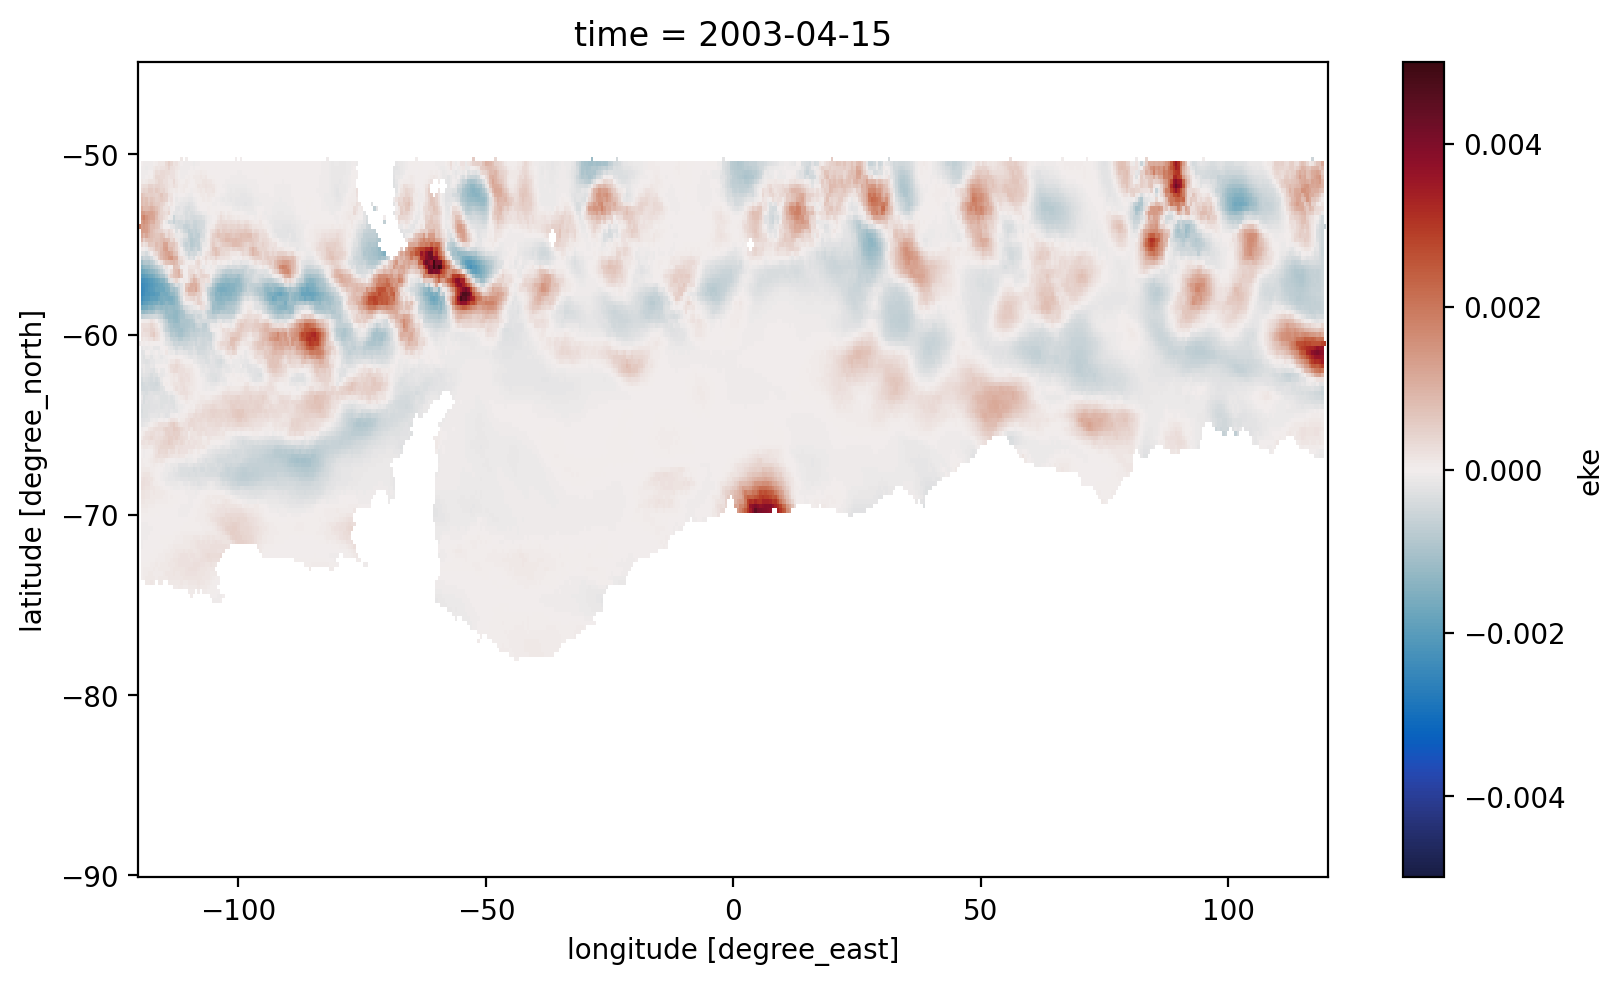

In [7]:
# Create movie object
mov = Movie(eke_anom, plotfunc=None, cmap=cmocean.cm.balance)

# single preview frame
mov.preview(10)

In [8]:
# save movie 
#mov.save('eke_anomaly_movie.gif')